In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Fetch data from DB

In [2]:
from data import get_enhanced_at_bats
from datetime import datetime

enhanced_at_bats = get_enhanced_at_bats(from_date = datetime(2015, 1, 1))
enhanced_at_bats

events  \
game_date  game_pk home  team opponent at_bat batter pitcher              
2015-04-05 413661  False STL  CHC      1      572761 452657   field_out   
                                       2      518792 452657      double   
                                       3      407812 452657      single   
                                       4      425509 452657   strikeout   
                                       5      571431 452657   strikeout   
...                                                                 ...   
2023-08-29 716807  True  MIA  TB       79     493329 518617   field_out   
                                       80     607732 518617   field_out   
                                       81     542932 518617      single   
                                       82     641658 518617        walk   
                                       83     660821 518617   field_out   

                                                                rhb    rhp  \
game_date  game_pk home  team opponent at_bat batter pitcher                 
2015-04-05 413661  False STL  CHC      1      572761 452657   False  False   
                                       2      518792 452657   False  False   
                                       3      407812 452657    True  False   
                                       4      425509 452657    True  False   
                                       5      571431 452657   False  False   
...                                                             ...    ...   
2023-08-29 716807  True  MIA  TB       79     493329 518617    True  False   
                                       80     607732 518617    True  False   
                                       81     542932 518617    True  False   
                                       82     641658 518617    True  False   
                                       83     660821 518617   False  False   

                                                                xBA  opp_sp  \
game_date  game_pk home  team opponent at_bat batter pitcher                  
2015-04-05 413661  False STL  CHC      1      572761 452657     NaN  452657   
                                       2      518792 452657     NaN  452657   
                                       3      407812 452657     NaN  452657   
                                       4      425509 452657     NaN  452657   
                                       5      571431 452657     NaN  452657   
...                                                             ...     ...   
2023-08-29 716807  True  MIA  TB       79     493329 518617   0.014  650644   
                                       80     607732 518617   0.023  650644   
                                       81     542932 518617   0.557  650644   
                                       82     641658 518617     NaN  650644   
                                       83     660821 518617   0.271  650644   

                                                             bats  hp_to_1b  \
game_date  game_pk home  team opponent at_bat batter pitcher                  
2015-04-05 413661  False STL  CHC      1      572761 452657     L      4.28   
                                       2      518792 452657     L      4.36   
                                       3      407812 452657     R      4.54   
                                       4      425509 452657     R      4.75   
                                       5      571431 452657     L      4.71   
...                                                           ...       ...   
2023-08-29 716807  True  MIA  TB       79     493329 518617     R      4.48   
                                       80     607732 518617     R      5.11   
                                       81     542932 518617     R      4.29   
                                       82     641658 518617     R      4.24   
                                       83     660821 518617     L      4.44   

                  

# Initialize classifier

In [3]:
from model import BTSBatterClassifier
from sklearn.neural_network import MLPClassifier

nn = BTSBatterClassifier(MLPClassifier(random_state = 57), at_bats_df = enhanced_at_bats, pkl_name = 'nn')

# Batter per game and per PA aggregations

In [4]:
nn.batter_per_game_agg()

G_last_50G  HG%_last_50G  xHG%_last_50G  \
game_date  game_pk home  batter                                            
2015-04-05 413661  False 407812           0          0.00           0.00   
                         425509           0          0.00           0.00   
                         425794           0          0.00           0.00   
                         425877           0          0.00           0.00   
                         445055           0          0.00           0.00   
...                                     ...           ...            ...   
2023-08-29 716807  True  624585          50          0.70           0.42   
                         650333          50          0.76           0.58   
                         650559          50          0.64           0.44   
                         665862          50          0.70           0.38   
                         669394          50          0.62           0.42   

                                 PA/G_last_50G  BIP/G_last_50G  H/G_last_50G  \
game_date  game_pk home  batter                                                
2015-04-05 413661  False 407812           0.00            0.00          0.00   
                         425509           0.00            0.00          0.00   
                         425794           0.00            0.00          0.00   
                         425877           0.00            0.00          0.00   
                         445055           0.00            0.00          0.00   
...                                        ...             ...           ...   
2023-08-29 716807  True  624585           4.32            2.78          0.88   
                         650333           4.38            3.92          1.18   
                         650559           4.26            3.04          0.92   
                         665862           4.20            2.72          0.94   
                         669394           4.10            2.68          0.94   

                                 xH/G_last_50G  
game_date  game_pk home  batter                 
2015-04-05 413661  False 407812        0.00000  
                         425509        0.00000  
                         425794        0.00000  
                         425877        0.00000  
                         445055        0.00000  
...                                        ...  
2023-08-29 716807  True  624585        0.98942  
                         650333        1.20140  
                         650559        1.03228  
                         665862        0.87908  
                         669394        0.93672  

[339640 rows x 7 columns]

In [5]:
nn.batter_per_pa_agg()

PA_last_200PA  BIP/PA_last_200PA  H/PA_last_200PA  \
game_date  game_pk batter                                                      
2015-04-05 413661  407812              0           0.000000         0.000000   
                   424325              0           0.000000         0.000000   
                   425509              0           0.000000         0.000000   
                   425794              0           0.000000         0.000000   
                   425877              0           0.000000         0.000000   
...                                  ...                ...              ...   
2023-08-29 716807  668227            200           0.635000         0.185000   
                   669394            200           0.670000         0.240000   
                   670042            200           0.575000         0.230000   
                   670623            200           0.710000         0.210000   
                   678545             47           0.659574         0.255319   

                           xH/PA_last_200PA  
game_date  game_pk batter                    
2015-04-05 413661  407812          0.000000  
                   424325          0.000000  
                   425509          0.000000  
                   425794          0.000000  
                   425877          0.000000  
...                                     ...  
2023-08-29 716807  668227          0.192630  
                   669394          0.234780  
                   670042          0.186755  
                   670623          0.211080  
                   678545          0.169234  

[414572 rows x 4 columns]

# Pitcher and bullpen per BF aggregations

In [6]:
nn.pitcher_per_bf_agg()

BF_last_200BF  K%_last_200BF  BB%_last_200BF  \
game_date  game_pk pitcher                                                 
2015-04-05 413661  425794               0       0.000000        0.000000   
                   435400               0       0.000000        0.000000   
                   444468               0       0.000000        0.000000   
                   452657               0       0.000000        0.000000   
                   457435               0       0.000000        0.000000   
...                                   ...            ...             ...   
2023-08-29 716807  596112             200       0.360000        0.075000   
                   605347             200       0.160000        0.115000   
                   645261             200       0.230000        0.050000   
                   650644             200       0.205000        0.045000   
                   666277             155       0.258065        0.129032   

                            H/PA_last_200BF  xH/PA_last_200BF  
game_date  game_pk pitcher                                     
2015-04-05 413661  425794           0.00000          0.000000  
                   435400           0.00000          0.000000  
                   444468           0.00000          0.000000  
                   452657           0.00000          0.000000  
                   457435           0.00000          0.000000  
...                                     ...               ...  
2023-08-29 716807  596112           0.16000          0.182450  
                   605347           0.25000          0.250805  
                   645261           0.21000          0.234995  
                   650644           0.22500          0.231485  
                   666277           0.16129          0.189994  

[170301 rows x 5 columns]

In [7]:
nn.bullpen_per_bf_agg()

BF_last_200BF  K%_last_200BF  BB%_last_200BF  \
game_date  game_pk opponent                                                 
2015-04-05 413661  CHC                   0          0.000           0.000   
                   STL                   0          0.000           0.000   
2015-04-06 413649  LAA                   0          0.000           0.000   
                   SEA                   0          0.000           0.000   
           413650  ATL                   0          0.000           0.000   
...                                    ...            ...             ...   
2023-08-29 716803  CIN                 200          0.225           0.140   
           716806  LAA                 200          0.250           0.115   
                   PHI                 200          0.260           0.080   
           716807  MIA                 200          0.230           0.125   
                   TB                  200          0.275           0.085   

                             H/PA_last_200BF  xH/PA_last_200BF  
game_date  game_pk opponent                                     
2015-04-05 413661  CHC                 0.000          0.000000  
                   STL                 0.000          0.000000  
2015-04-06 413649  LAA                 0.000          0.000000  
                   SEA                 0.000          0.000000  
           413650  ATL                 0.000          0.000000  
...                                      ...               ...  
2023-08-29 716803  CIN                 0.150          0.159390  
           716806  LAA                 0.270          0.217395  
                   PHI                 0.215          0.208350  
           716807  MIA                 0.175          0.196420  
                   TB                  0.200          0.212190  

[39304 rows x 5 columns]

# Fit classifier

In [8]:
nn.fit_model(scale_features = True, perform_pca = False)

Score on training data: 0.653
Score on testing data: 0.638


# Simulate results on test data

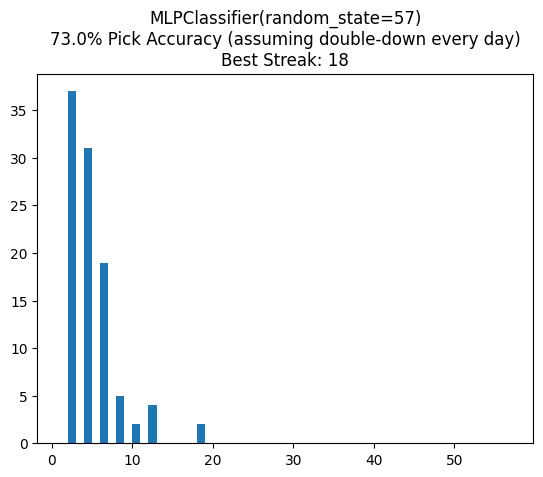

In [9]:
nn.simulate_results()

# Get predictions for today

In [10]:
todays_predictions = nn.todays_predictions()
todays_predictions

GET https://www.mlb.com/apps/beat-the-streak/game/json/units.json (200) 0.23s
GET https://www.mlb.com/apps/beat-the-streak/game/json/squads.json (200) 0.12s
GET https://www.mlb.com/apps/beat-the-streak/game/json/players.json (200) 0.13s


lineup  \
game_date           game_pk home  team opponent batter           
2023-08-30 20:35:00 716773  False ATL  COL      660670       1   
2023-08-30 15:02:00 716785  True  TOR  WSH      665489       3   
2023-08-30 20:35:00 716773  False ATL  COL      518595       6   
                                                663586       3   
2023-08-30 14:15:00 716779  False MIL  CHC      661388       2   
...                                                        ...   
2023-08-30 13:05:00 716784  True  MIN  CLE      656669      10   
2023-08-30 13:00:00 716787  False LAA  PHI      595453      10   
2023-08-30 16:05:00 716794  False HOU  BOS      455117       9   
2023-08-30 18:35:00 716781  False NYY  DET      666163       9   
2023-08-30 14:15:00 716779  True  CHC  MIL      621550      10   

                                                                         name  \
game_date           game_pk home  team opponent batter                          
2023-08-30 20:35:00 716773  False ATL  COL      660670       Ronald Acuña Jr.   
2023-08-30 15:02:00 716785  True  TOR  WSH      665489  Vladimir Guerrero Jr.   
2023-08-30 20:35:00 716773  False ATL  COL      518595        Travis d'Arnaud   
                                                663586           Austin Riley   
2023-08-30 14:15:00 716779  False MIL  CHC      661388      William Contreras   
...                                                                       ...   
2023-08-30 13:05:00 716784  True  MIN  CLE      656669          Jordan Luplow   
2023-08-30 13:00:00 716787  False LAA  PHI      595453           Chad Wallach   
2023-08-30 16:05:00 716794  False HOU  BOS      455117       Martín Maldonado   
2023-08-30 18:35:00 716781  False NYY  DET      666163           Ben Rortvedt   
2023-08-30 14:15:00 716779  True  CHC  MIL      621550         Patrick Wisdom   

                                                       bats  opp_sp  \
game_date           game_pk home  team opponent batter                
2023-08-30 20:35:00 716773  False ATL  COL      660670    R  607536   
2023-08-30 15:02:00 716785  True  TOR  WSH      665489    R  571578   
2023-08-30 20:35:00 716773  False ATL  COL      518595    R  607536   
                                                663586    R  607536   
2023-08-30 14:15:00 716779  False MIL  CHC      661388    R  543294   
...                                                     ...     ...   
2023-08-30 13:05:00 716784  True  MIN  CLE      656669    R  676440   
2023-08-30 13:00:00 716787  False LAA  PHI      595453    R  650911   
2023-08-30 16:05:00 716794  False HOU  BOS      455117    R  676710   
2023-08-30 18:35:00 716781  False NYY  DET      666163    L  686839   
2023-08-30 14:15:00 716779  True  CHC  MIL      621550    R  605540   

                                                               opp_sp_name  \
game_date           game_pk home  team opponent batter                       
2023-08-30 20:35:00 716773  False ATL  COL      660670       Kyle Freeland   
2023-08-30 15:02:00 716785  True  TOR  WSH      665489      Patrick Corbin   
2023-08-30 20:35:00 716773  False ATL  COL      518595       Kyle Freeland   
                                                663586       Kyle Freeland   
2023-08-30 14:15:00 716779  False MIL  CHC      661388      Kyle Hendricks   
...                                                                    ...   
2023-08-30 13:05:00 716784  True  MIN  CLE      656669        Tanner Bibee   
2023-08-30 13:00:00 716787  False LAA  PHI      595453  Cristopher Sánchez   
2023-08-30 16:05:00 716794  False HOU  BOS      455117     Kutter Crawford   
2023-08-30 18:35:00 716781  False NYY  DET      666163       Brendan White   
2023-08-30 14:15:00 716779  True  CHC  MIL      621550    Brandon Woodruff   

                                                       opp_sp_throws  \
game_date           game_pk home  team opponent batter                 
2023-08-30 20:35:00 716773  False ATL  COL      660670      